In [177]:
train_data="/Users/deepanshubissu/Desktop/archive-1/train"
test_data="/Users/deepanshubissu/Desktop/archive-1/test"
val_data="/Users/deepanshubissu/Desktop/archive-1/validation"

In [178]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [179]:
import tensorflow as tf

In [180]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [182]:
batch_size = 32
image_size = 256

train_data_cnn = tf.keras.preprocessing.image_dataset_from_directory(train_data,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

val_data_cnn = tf.keras.preprocessing.image_dataset_from_directory(val_data,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [156]:

train_data_ann = keras.utils.image_dataset_from_directory(
    directory = train_data,
    
    
    batch_size=32,
    image_size=(28,28)
)
test_data_ann = keras.utils.image_dataset_from_directory(
    directory = test_data,
    
    
    batch_size=32,
    image_size=(28,28)
)
val_data_ann = keras.utils.image_dataset_from_directory(
    directory = val_data,
    
    
    batch_size=32,
    image_size=(28,28)
)


Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [157]:

classes = train_data_ann.class_names
print((classes))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [158]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [159]:
train_ann = train_data_ann.map(format)

In [160]:
test_ann = test_data_ann.map(format)

In [189]:
train_cnn = train_data_cnn.map(format)

In [190]:
X_train=[]
y_train=[]
for format_image_batch, format_label_batch in train_cnn:
    for j in format_image_batch:
        X_train.append(j)
    for j in format_label_batch:
        y_train.append(j)

In [195]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [161]:

X_train_ann=[]
y_train_ann=[]
for format_image_batch, format_label_batch in train_ann:
    for j in format_image_batch:
        X_train_ann.append(j)
    for j in format_label_batch:
        y_train_ann.append(j)

    

In [162]:

X_test_ann=[]
y_test_ann=[]
for format_image_batch, format_label_batch in test_ann:
    for j in format_image_batch:
        X_test_ann.append(j)
    for j in format_label_batch:
        y_test_ann.append(j)

    

In [163]:
import numpy as np

In [164]:
X_train_ann=np.array(X_train_ann)

In [165]:
X_test_ann=np.array(X_test_ann)

In [166]:
y_train_ann=np.array(y_train_ann)

In [167]:
y_test_ann=np.array(y_test_ann)

In [168]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [169]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [170]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

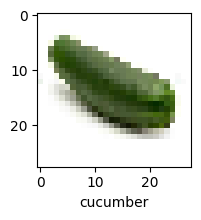

In [171]:


plot_sample(X_train_ann, y_train_ann, 1)



In [172]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [201]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(36, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=ann.fit(X_train_ann, y_train_ann, epochs=100,validation_data=val_data_ann)


Epoch 1/100
98/98 [==============================] - 11s 105ms/step - loss: 3.5241 - accuracy: 0.0559 - val_loss: 200.9420 - val_accuracy: 0.0997
Epoch 2/100
98/98 [==============================] - 9s 94ms/step - loss: 3.2561 - accuracy: 0.1210 - val_loss: 202.8051 - val_accuracy: 0.1681
Epoch 3/100
98/98 [==============================] - 9s 96ms/step - loss: 3.0401 - accuracy: 0.1753 - val_loss: 297.5779 - val_accuracy: 0.1909
Epoch 4/100
98/98 [==============================] - 9s 94ms/step - loss: 2.8641 - accuracy: 0.2151 - val_loss: 236.5313 - val_accuracy: 0.2422
Epoch 5/100
98/98 [==============================] - 9s 96ms/step - loss: 2.7309 - accuracy: 0.2488 - val_loss: 210.0781 - val_accuracy: 0.2650
Epoch 6/100
98/98 [==============================] - 9s 93ms/step - loss: 2.6143 - accuracy: 0.2867 - val_loss: 226.0693 - val_accuracy: 0.3077
Epoch 7/100
98/98 [==============================] - 9s 97ms/step - loss: 2.5123 - accuracy: 0.3127 - val_loss: 205.3241 - val_accurac

98/98 [==============================] - 13s 136ms/step - loss: 0.3750 - accuracy: 0.9380 - val_loss: 172.1867 - val_accuracy: 0.7208
Epoch 58/100
98/98 [==============================] - 10s 102ms/step - loss: 0.3679 - accuracy: 0.9377 - val_loss: 35.7395 - val_accuracy: 0.9430
Epoch 59/100
98/98 [==============================] - 9s 98ms/step - loss: 0.3477 - accuracy: 0.9435 - val_loss: 41.9195 - val_accuracy: 0.9288
Epoch 60/100
98/98 [==============================] - 10s 98ms/step - loss: 0.3214 - accuracy: 0.9486 - val_loss: 39.8509 - val_accuracy: 0.9259
Epoch 61/100
98/98 [==============================] - 9s 94ms/step - loss: 0.2980 - accuracy: 0.9522 - val_loss: 167.4356 - val_accuracy: 0.7179
Epoch 62/100
98/98 [==============================] - 11s 112ms/step - loss: 0.3198 - accuracy: 0.9448 - val_loss: 264.9975 - val_accuracy: 0.7123
Epoch 63/100
98/98 [==============================] - 10s 104ms/step - loss: 0.3056 - accuracy: 0.9493 - val_loss: 47.4427 - val_accuracy: 

In [202]:
test_loss, test_acc = ann.evaluate(X_test_ann, y_test_ann, verbose=1) # verbose is a parameter of how detailed is the log in the console
print("************ Test accuracy : ", test_acc)

12/12 [==============================] - 0s 15ms/step - loss: 0.2401 - accuracy: 0.9582
************ Test accuracy :  0.9582172632217407


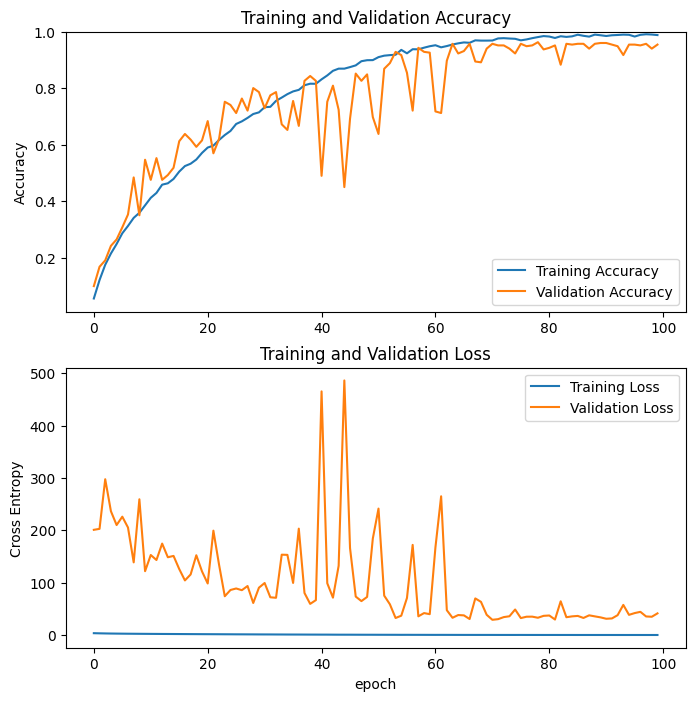

In [203]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [133]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/Users/deepanshubissu/Desktop/watermelon.jpg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((28, 28))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

a=np.array(img_tensor)

p=[]
p.append(img_tensor)
p=np.array(p)
y_pred = ann.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print(classes[y_classes[0]])

1/1 [==============================] - 0s 25ms/step
pineapple


# CNN

In [191]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [192]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')
])

In [193]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [204]:
cnn_history=cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
98/98 [==============================] - 263s 3s/step - loss: 3.2360 - accuracy: 0.1201
Epoch 2/5
98/98 [==============================] - 241s 2s/step - loss: 2.4826 - accuracy: 0.3104
Epoch 3/5
98/98 [==============================] - 258s 3s/step - loss: 1.2910 - accuracy: 0.6376
Epoch 4/5
98/98 [==============================] - 215s 2s/step - loss: 0.4445 - accuracy: 0.8867
Epoch 5/5
98/98 [==============================] - 212s 2s/step - loss: 0.1900 - accuracy: 0.9615
